## **Multi-Class Text Classification for make-up products by using Neural Networks**

In this project, we used Neural Network and Convolutional Neural Netwok to the text classification. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import utils
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
Corpus = pd.read_csv('/content/products_clean.csv', header=0,index_col=0)
Corpus.head()

,product_type,description
0,lipstic,lippie pencil long wearing high intensity lip ...
1,lipstic,blotted lip sheer matte lipstick creates perfe...
2,lipstic,lippie stix formula contains vitamin e mango a...
3,foundation,developed selfie age buildable full coverage n...
4,lipstic,product free lead heavy metal parabens phthala...


Spliting the data into train and test sets:

In [ ]:
#sentences = Corpus['description']
#y = Corpus['product_type']

#sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['description'],Corpus['product_type'],test_size=0.3)

**Word Embeddings**

Word Embedding is a representation of text where words that have the same meaning have a similar representation. It shows words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as  Keras, this part is generally handled by an embedding layer.

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['product_type'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Tfidf_vect.vocabulary_)

{'lipstic': 3, 'foundation': 2, 'eye_makeup': 1, 'contour': 0, 'nail_polish': 4}


In [ ]:
print(Train_X_Tfidf)

  (7, 0)	1.0
  (12, 0)	1.0
  (13, 2)	1.0
  (16, 2)	1.0
  (17, 0)	1.0
  (48, 0)	1.0
  (53, 2)	1.0
  (59, 2)	1.0
  (82, 0)	1.0
  (92, 0)	1.0
  (117, 2)	1.0
  (130, 2)	1.0
  (133, 0)	1.0
  (134, 2)	1.0
  (139, 2)	1.0
  (142, 0)	1.0
  (150, 2)	1.0
  (151, 0)	1.0
  (158, 2)	1.0
  (179, 2)	1.0
  (185, 2)	1.0
  (188, 2)	1.0
  (193, 2)	1.0
  (194, 2)	1.0
  (210, 0)	1.0
  :	:
  (440, 0)	1.0
  (442, 0)	1.0
  (443, 2)	1.0
  (458, 0)	1.0
  (466, 2)	1.0
  (470, 0)	1.0
  (472, 0)	1.0
  (480, 0)	1.0
  (501, 2)	1.0
  (526, 2)	1.0
  (527, 2)	1.0
  (535, 2)	1.0
  (552, 2)	1.0
  (555, 2)	1.0
  (567, 2)	1.0
  (570, 2)	1.0
  (576, 0)	1.0
  (593, 2)	1.0
  (596, 2)	1.0
  (599, 0)	1.0
  (613, 2)	1.0
  (614, 2)	1.0
  (627, 2)	1.0
  (631, 2)	1.0
  (632, 2)	1.0


In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  50.36764705882353


In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  51.83823529411765


In [ ]:
maxlen = 50

X_train = pad_sequences(Train_X, padding='post', maxlen=maxlen)
X_test = pad_sequences(Test_X, padding='post', maxlen=maxlen)

print(X_train[0, :])

ValueError: ignored

In [ ]:
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Building the neural network model**

We built and trained a several models to choose best of them. First of them is a simple neural network model.

In [ ]:
embedding_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           72304     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 16)                25616     
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 98,005
Trainable params: 98,005
Non-trainable params: 0
_________________________________________________________________


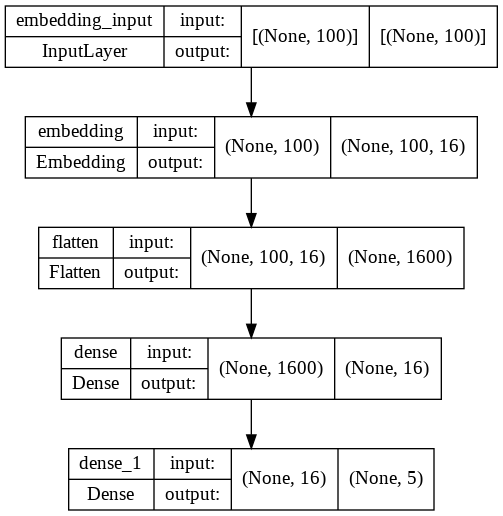

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 14ms/step - loss: 1.5380 - accuracy: 0.3756 - val_loss: 1.4221 - val_accuracy: 0.4670
Epoch 2/15
22/22 [==============================] - 0s 5ms/step - loss: 1.4487 - accuracy: 0.4050 - val_loss: 1.3868 - val_accuracy: 0.4758
Epoch 3/15
22/22 [==============================] - 0s 6ms/step - loss: 1.3750 - accuracy: 0.4212 - val_loss: 1.3116 - val_accuracy: 0.4802
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 1.2404 - accuracy: 0.4919 - val_loss: 1.1805 - val_accuracy: 0.5022
Epoch 5/15
22/22 [==============================] - 0s 5ms/step - loss: 1.0367 - accuracy: 0.6568 - val_loss: 0.9856 - val_accuracy: 0.6564
Epoch 6/15
22/22 [==============================] - 0s 5ms/step - loss: 0.7926 - accuracy: 0.8159 - val_loss: 0.8134 - val_accuracy: 0.8326
Epoch 7/15
22/22 [==============================] - 0s 6ms/step - loss: 0.5582 - accuracy: 0.9161 - val_loss: 0.6325 - val_accuracy: 0.8678
Epoch 8/15
22/22 [=

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9985
Testing Accuracy:  0.9163


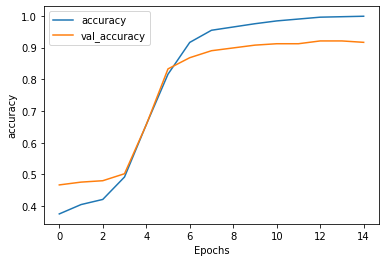

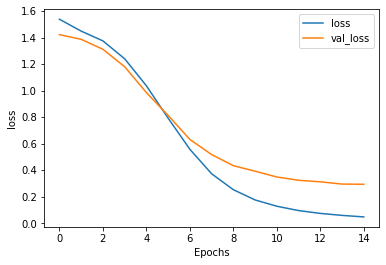

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

 At the end of the training, we can see that there is a little bit overfitting. 
 
 Now we add dropout layers as a method of regularization.

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           72304     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                25616     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 98,005
Trainable params: 98,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=15,
                        validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 12ms/step - loss: 1.5638 - accuracy: 0.3314 - val_loss: 1.4575 - val_accuracy: 0.4670
Epoch 2/15
22/22 [==============================] - 0s 6ms/step - loss: 1.5183 - accuracy: 0.3859 - val_loss: 1.4460 - val_accuracy: 0.4714
Epoch 3/15
22/22 [==============================] - 0s 5ms/step - loss: 1.4865 - accuracy: 0.3976 - val_loss: 1.4223 - val_accuracy: 0.4714
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 1.4292 - accuracy: 0.4227 - val_loss: 1.3594 - val_accuracy: 0.4802
Epoch 5/15
22/22 [==============================] - 0s 5ms/step - loss: 1.3175 - accuracy: 0.4713 - val_loss: 1.2560 - val_accuracy: 0.5198
Epoch 6/15
22/22 [==============================] - 0s 5ms/step - loss: 1.1762 - accuracy: 0.5214 - val_loss: 1.1131 - val_accuracy: 0.6211
Epoch 7/15
22/22 [==============================] - 0s 5ms/step - loss: 1.0402 - accuracy: 0.5994 - val_loss: 0.9639 - val_accuracy: 0.7181
Epoch 8/15
22/22 [=

In [ ]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9823
Testing Accuracy:  0.8678


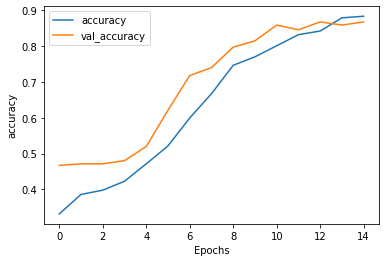

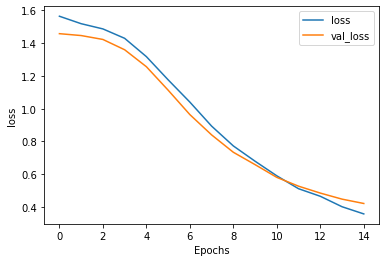

In [ ]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. 

In this case we used GlobalMaxPooling1D which is built-in layer Keras and we can add it to the sequential model:

In [ ]:
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(5, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           225950    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 16)                816       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 226,851
Trainable params: 226,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 16ms/step - loss: 1.5945 - accuracy: 0.2062 - val_loss: 1.5692 - val_accuracy: 0.1938
Epoch 2/15
22/22 [==============================] - 0s 9ms/step - loss: 1.5589 - accuracy: 0.4507 - val_loss: 1.5279 - val_accuracy: 0.5639
Epoch 3/15
22/22 [==============================] - 0s 9ms/step - loss: 1.5144 - accuracy: 0.5140 - val_loss: 1.4701 - val_accuracy: 0.4934
Epoch 4/15
22/22 [==============================] - 0s 9ms/step - loss: 1.4467 - accuracy: 0.4683 - val_loss: 1.3884 - val_accuracy: 0.5066
Epoch 5/15
22/22 [==============================] - 0s 8ms/step - loss: 1.3426 - accuracy: 0.5155 - val_loss: 1.2640 - val_accuracy: 0.5595
Epoch 6/15
22/22 [==============================] - 0s 9ms/step - loss: 1.1994 - accuracy: 0.5552 - val_loss: 1.1116 - val_accuracy: 0.6123
Epoch 7/15
22/22 [==============================] - 0s 8ms/step - loss: 1.0328 - accuracy: 0.6760 - val_loss: 0.9562 - val_accuracy: 0.6740
Epoch 8/15
22/22 [=

In [ ]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9750
Testing Accuracy:  0.9075


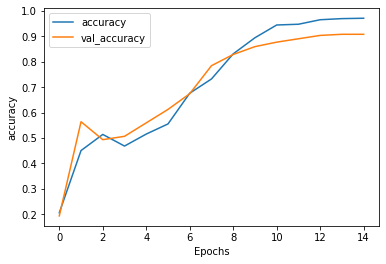

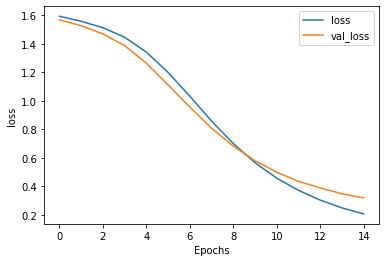

In [ ]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

#### Final Neural Network model

Our final Neural Network consist of an Embedding layer with GlobalMaxPool1D layer, hidden layer using the ReLU activation function. The output layer using the softmax activation function. We also used dropout layers as a method of regularization.
We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [ ]:
embedding_dim = 50

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(5, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           225950    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                816       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 85        
                                                      

We trained NN model for 15 epoch:

In [ ]:
history_4 = model4.fit(X_train, y_train,
                       batch_size=32,
                       epochs=50,
                       validation_data=(X_test, y_test))

Epoch 1/50
22/22 [==============================] - 1s 15ms/step - loss: 1.6016 - accuracy: 0.2769 - val_loss: 1.5719 - val_accuracy: 0.4670
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 1.5603 - accuracy: 0.4006 - val_loss: 1.5278 - val_accuracy: 0.4670
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 1.5145 - accuracy: 0.4006 - val_loss: 1.4682 - val_accuracy: 0.4670
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 1.4549 - accuracy: 0.4138 - val_loss: 1.3956 - val_accuracy: 0.4670
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 1.3859 - accuracy: 0.4492 - val_loss: 1.3135 - val_accuracy: 0.4846
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 1.3051 - accuracy: 0.4845 - val_loss: 1.2216 - val_accuracy: 0.5286
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 1.2189 - accuracy: 0.5228 - val_loss: 1.1197 - val_accuracy: 0.5727
Epoch 8/50
22/22 [=

In [ ]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9985
Testing Accuracy:  0.9427


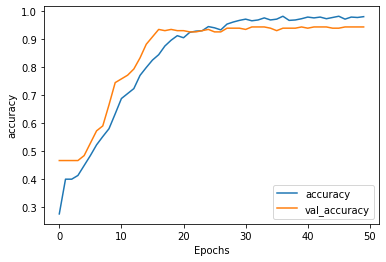

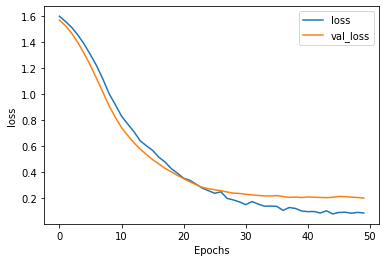

In [ ]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

**Convolutional Neural Network (CNN)**

A simple CNN architecture: Embedding layer with single layer Convolutional Neural Network (with RELU activation), and the GlobalMaxPool1D layer as well. The hidden layer using the ReLU activation function and an output layer using the softmax activation function. We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [ ]:
embedding_dim = 50

model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model5.add(Conv1D(128, 5, activation='relu'))
model5.add(GlobalMaxPool1D())
model5.add(Dense(10, activation='relu'))
model5.add(Dense(5, activation='softmax'))

model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           225950    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
Total params: 259,423
Trainable params: 259,423
Non-trainable params: 0
________________________________________________

We trained CNN model for 5 epoch:

In [ ]:
history_5 = model5.fit(X_train, y_train,
                       batch_size=10,
                       epochs=20,
                       validation_data=(X_test, y_test))

Epoch 1/20
68/68 [==============================] - 2s 16ms/step - loss: 1.5058 - accuracy: 0.3873 - val_loss: 1.3467 - val_accuracy: 0.4670
Epoch 2/20
68/68 [==============================] - 1s 14ms/step - loss: 1.1199 - accuracy: 0.5552 - val_loss: 0.6775 - val_accuracy: 0.7797
Epoch 3/20
68/68 [==============================] - 1s 13ms/step - loss: 0.4479 - accuracy: 0.8675 - val_loss: 0.3092 - val_accuracy: 0.9119
Epoch 4/20
68/68 [==============================] - 1s 14ms/step - loss: 0.1733 - accuracy: 0.9588 - val_loss: 0.2272 - val_accuracy: 0.9339
Epoch 5/20
68/68 [==============================] - 1s 15ms/step - loss: 0.0749 - accuracy: 0.9838 - val_loss: 0.2151 - val_accuracy: 0.9207
Epoch 6/20
68/68 [==============================] - 1s 13ms/step - loss: 0.0380 - accuracy: 0.9941 - val_loss: 0.2179 - val_accuracy: 0.9251
Epoch 7/20
68/68 [==============================] - 1s 13ms/step - loss: 0.0233 - accuracy: 0.9985 - val_loss: 0.2023 - val_accuracy: 0.9339
Epoch 8/20
68

In [ ]:
loss, accuracy = model5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9985
Testing Accuracy:  0.9339


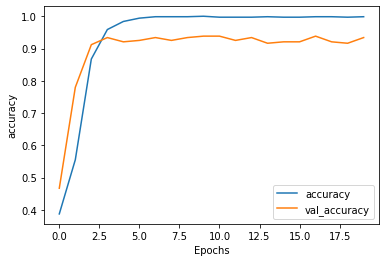

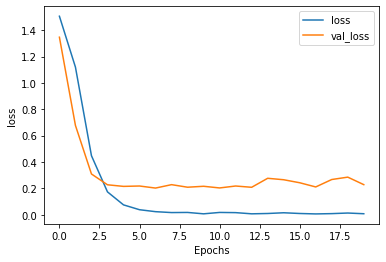

In [ ]:
plot_graphs(history_5, "accuracy")
plot_graphs(history_5, "loss")

In [ ]:
from google.colab import files
model_json = model.to_json()
with open("model5.json","w") as json_file:
     json_file.write(model_json)

files.download("model5.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
model5.save('weights.h5')
files.download('weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>